# Logistic Regression and Balanced Random Forest - Flight Cancellation Prediction

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

## Data Cleaning

In [2]:
# read data
plane_df = pd.read_csv('2018.csv')
plane_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#determine columns with missing values
sum_missing_values = plane_df.isna().sum()
print(sum_missing_values)

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64


In [4]:
plane_df = plane_df.drop(columns=['Unnamed: 27'])

In [5]:
plane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [6]:
plane_df['CANCELLATION_CODE'].fillna('E', inplace=True) #E means plane isn't cancelled
plane_df['CANCELLATION_CODE'].unique()

array(['E', 'B', 'A', 'C', 'D'], dtype=object)

In [7]:
#replace missing duration values with 0
missing_duration_cols = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for col in missing_duration_cols:
    plane_df[col].fillna(0, inplace=True)

In [8]:
check_duration_na_fix = plane_df.isna().sum()
print(check_duration_na_fix)

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY                   0
TAXI_OUT                    0
WHEELS_OFF             115829
WHEELS_ON              119246
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME               119245
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
dtype: int64


In [9]:
#replace missing time values with 0
time_columns = ['DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME']

for col in time_columns:
    plane_df[col].fillna(0, inplace=True)

In [10]:
#time columns now have no NAs
check_duration_na_fix = plane_df.isna().sum()
print(check_duration_na_fix)

FL_DATE                0
OP_CARRIER             0
OP_CARRIER_FL_NUM      0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
TAXI_OUT               0
WHEELS_OFF             0
WHEELS_ON              0
TAXI_IN                0
CRS_ARR_TIME           0
ARR_TIME               0
ARR_DELAY              0
CANCELLED              0
CANCELLATION_CODE      0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64


In [11]:
#update fl_date to date type
plane_df['FL_DATE']=pd.to_datetime(plane_df['FL_DATE'])

plane_df['FL_DATE']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
7213441   2018-12-31
7213442   2018-12-31
7213443   2018-12-31
7213444   2018-12-31
7213445   2018-12-31
Name: FL_DATE, Length: 7213446, dtype: datetime64[ns]

## Flight Cancellation Classification Model


To address the economical, operational, and customer satisfaction challenges associated with flight cancellations, classification models will be used to predict whether a flight will be cancelled based on select features. In this case, the target variable is the 'CANCELLED' column where '0' means the flight is not cancelled and '1' means the flight is cancelled. Relevant features such as 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE' will be used to train the model to predict flight cancellation.

Specifically, classification methods such as logistic regression and balanced random forest will be used. Their efficiency in predicting flight cancellations will be compared by evaluating their performance through different metrics and identifying the more suitable model. The overall aim of this model is to support strategic decision making in the aviation industry, improving customer experience and operational efficiency. 


## Feature Selection

C:\Users\OWNER\AppData\Local\Temp\ipykernel_24124\3888193429.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = plane_df.corr()


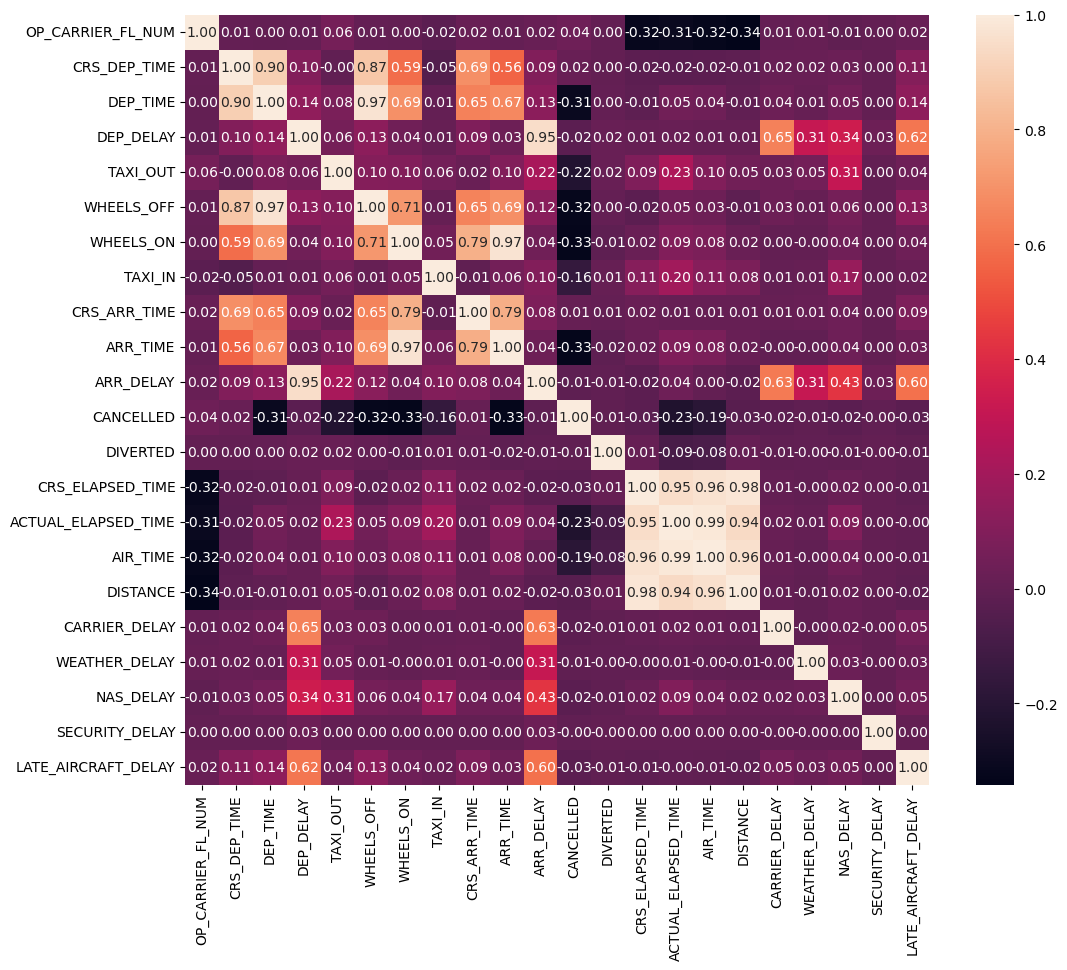

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = plane_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

In [38]:
plane_df['CANCELLED'].value_counts()

0.0    7096862
1.0     116584
Name: CANCELLED, dtype: int64

### Interpretation: 

Cancelled codes (1) are much rarer compared to non-cancelled codes (0). Therefore, this is an imbalanced class with cancelled being the minority class and non-cancelled being the majority class. To put this into perspective, for every flight that is cancelled, there are roughly 60 flights that are not cancelled. 

To avoid high model bias towards predicting the majority class, the minority class can be over-sampled and/or the majority class can be under-sampled. In our case, to address this class imbalance, the sample taken from the dataset will be evenly split between cancelled and non-cancelled flights.

Note: Due to the size of the 2018 CSV and memory storage constraints, we will only be creating this model from a random sample of 500,000 rows.

## 1. Logistic Regression

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Randomly sample 500000 rows
plane_df_subset = plane_df.sample(n=500000, random_state=42)

# Split data evenly between cancelled and non-cancelled
uncanceled_flights = plane_df_subset[plane_df_subset['CANCELLED'] == 0].sample(n=10000, random_state=42)
canceled_flights = plane_df_subset[plane_df_subset['CANCELLED'] == 1].sample(n=10000, replace = True, random_state=42)
plane_df_subset_sampled = pd.concat([uncanceled_flights, canceled_flights])

# Extract components Year, Month, Day from FL_DATE column
plane_df_subset_sampled['FL_Year'] = plane_df_subset_sampled['FL_DATE'].dt.year
plane_df_subset_sampled['FL_Month'] = plane_df_subset_sampled['FL_DATE'].dt.month
plane_df_subset_sampled['FL_Day'] = plane_df_subset_sampled['FL_DATE'].dt.day

# Select features and target variable
X = plane_df_subset_sampled[['FL_DATE', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']]
y = plane_df_subset_sampled['CANCELLED']

# Drop the original 'FL_DATE' column
plane_df_subset_sampled.drop('FL_DATE', axis=1, inplace=True)
X = X.drop('FL_DATE', axis=1)

categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST']

# Encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
numerical_cols = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Fit logistic Regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.68725
Confusion Matrix:
[[1359  660]
 [ 591 1390]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.67      0.68      2019
         1.0       0.68      0.70      0.69      1981

    accuracy                           0.69      4000
   macro avg       0.69      0.69      0.69      4000
weighted avg       0.69      0.69      0.69      4000



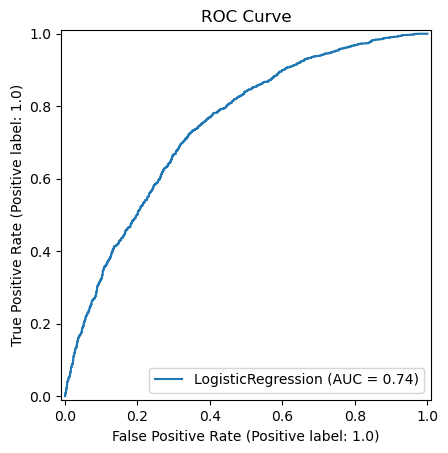

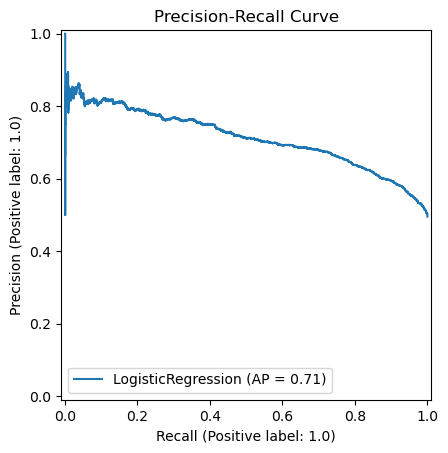

In [28]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Plot ROC curve
roc_display = RocCurveDisplay.from_estimator(model, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()

# Plot Precision-Recall curve
pr_display = PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()


### Feature Importance Analysis

In [38]:
original_numerical_cols = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']
original_categorical_cols = ['OP_CARRIER', 'ORIGIN', 'DEST']
coefficients = model.coef_[0]
feature_coefficients = dict(zip(X_train.columns, coefficients))

numerical_coefficients = {feature: coef for feature, coef in feature_coefficients.items() if feature in original_numerical_cols}
categorical_coefficients = {feature: coef for feature, coef in feature_coefficients.items() if feature.split('_')[0] in original_categorical_cols}

print("Numerical Coefficients:")
for feature, coef in numerical_coefficients.items():
    print(f"{feature}: {coef:.4f}")


Numerical Coefficients:
CRS_DEP_TIME: 0.1285
CRS_ARR_TIME: 0.0343
DISTANCE: -0.1435


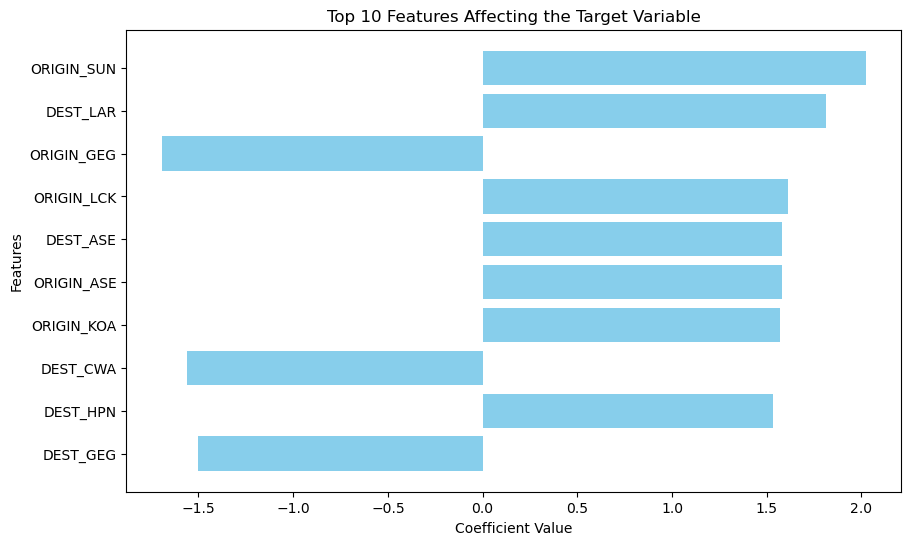

In [40]:
import matplotlib.pyplot as plt

#get top 10 features that have the greatest impact on flight cancellations
all_coefficients = {**numerical_coefficients, **categorical_coefficients}
sorted_coefficients = sorted(all_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)
top_coefficients = sorted_coefficients[:10]
top_features, top_coefs = zip(*top_coefficients)

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_coefs, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Top 10 Features Affecting the Target Variable')
plt.gca().invert_yaxis()
plt.show()

In the logistic regression model, the top 10 features that have the greatest effect on flight cancellations are given in the graph above. They are all airport codes with different destinations and origins. Positive coefficents are associated with a greater likelihood of cancellations, whereas negative coefficents are associated with a smaller likelihood of cancellations. 

Particularly, airport codes SUN, LAR, LCK, ASE, KOA, and HPN are more likely to have cancellations. This could could be due to location-specific challenges such as weather conditions, capacity constraints, or less efficient handling of logistics and flight operations. Airport codes GEG and CWA are less likely to have cancellations. These might be airports with better operational efficiency, more favorable weather conditions, or better processes for mitigating factors that lead to cancellations. It should be noted that GEG as the origin and destination is the least likely to have cancellations.

## 2. Balanced Random Forest

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

plane_df_subset2 = plane_df.sample(n=500000, random_state=42)

uncanceled_flights = plane_df_subset2[plane_df_subset2['CANCELLED'] == 0].sample(n=10000, random_state=42)
canceled_flights = plane_df_subset2[plane_df_subset2['CANCELLED'] == 1].sample(n=10000, replace = True, random_state=42)

plane_df_subset_sampled = pd.concat([uncanceled_flights, canceled_flights])

plane_df_subset_sampled['FL_Year'] = plane_df_subset_sampled['FL_DATE'].dt.year
plane_df_subset_sampled['FL_Month'] = plane_df_subset_sampled['FL_DATE'].dt.month
plane_df_subset_sampled['FL_Day'] = plane_df_subset_sampled['FL_DATE'].dt.day

X = plane_df_subset_sampled[['OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']]
y = plane_df_subset_sampled['CANCELLED']

plane_df_subset_sampled.drop('FL_DATE', axis=1, inplace=True)

X = pd.get_dummies(X, columns=['OP_CARRIER', 'ORIGIN', 'DEST'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train[['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']] = scaler.fit_transform(X_train[['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']])
X_test[['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']] = scaler.transform(X_test[['CRS_DEP_TIME', 'CRS_ARR_TIME', 'DISTANCE']])

brf_classifier = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf_classifier.fit(X_train, y_train)

y_pred = brf_classifier.predict(X_test)

accuracy = brf_classifier.score(X_test, y_test)
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

C:\Users\OWNER\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\OWNER\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
C:\Users\OWNER\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


Accuracy: 0.772

Confusion Matrix:
[[1479  540]
 [ 372 1609]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      2019
         1.0       0.75      0.81      0.78      1981

    accuracy                           0.77      4000
   macro avg       0.77      0.77      0.77      4000
weighted avg       0.77      0.77      0.77      4000



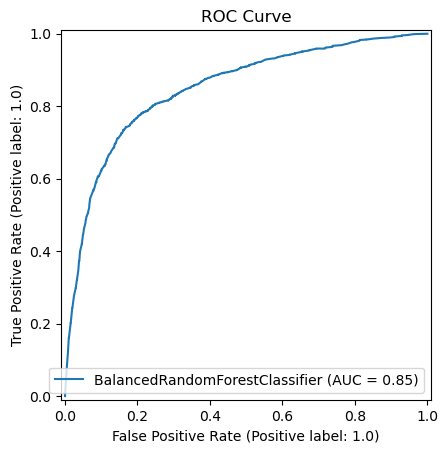

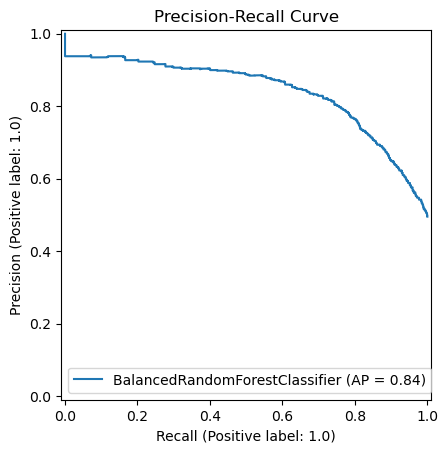

In [32]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

roc_display = RocCurveDisplay.from_estimator(brf_classifier, X_test, y_test)
roc_display.ax_.set_title('ROC Curve')
plt.show()

pr_display = PrecisionRecallDisplay.from_estimator(brf_classifier, X_test, y_test)
pr_display.ax_.set_title('Precision-Recall Curve')
plt.show()

### Feature Importance Analysis

For the Balanced Random Forest model, there are no coefficients for features. Instead, random forests make use of feature importance scores, which indicate how useful each feature is at reducing uncertainty in the trees.

In [33]:
importances = brf_classifier.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort to find the most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(10))

           Feature  Importance
1     CRS_ARR_TIME    0.174476
0     CRS_DEP_TIME    0.162993
2         DISTANCE    0.097464
6    OP_CARRIER_DL    0.022073
13   OP_CARRIER_OH    0.009336
15   OP_CARRIER_UA    0.008425
17   OP_CARRIER_WN    0.008013
3    OP_CARRIER_AA    0.008007
19   OP_CARRIER_YX    0.007685
191     ORIGIN_LGA    0.007424


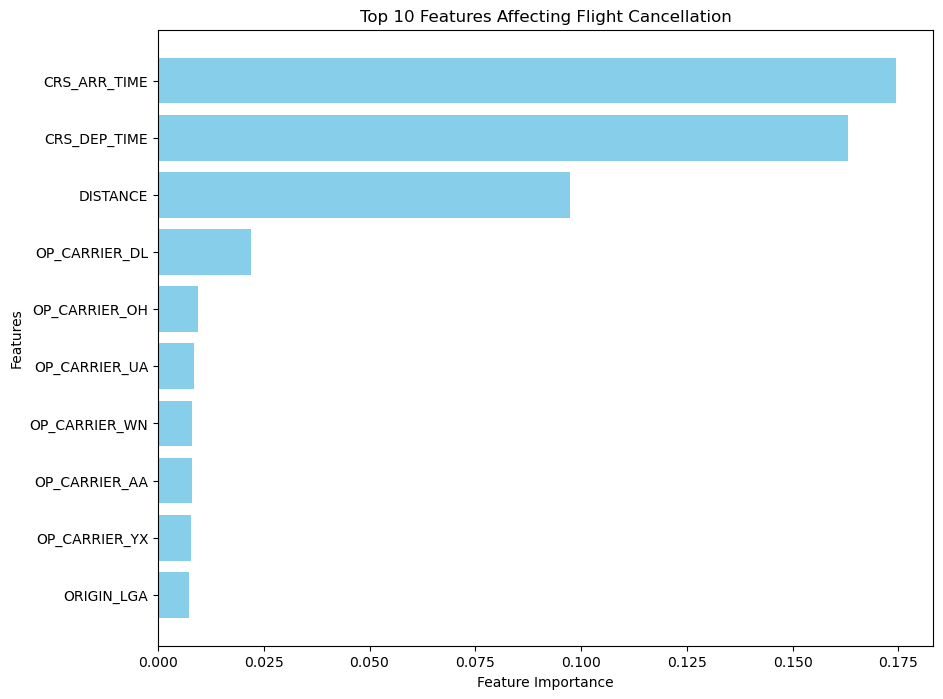

In [34]:
import matplotlib.pyplot as plt

# Plot top 10 features
top_features = feature_importance_df.head(10)
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Features Affecting Flight Cancellation')
plt.gca().invert_yaxis()
plt.show()


The numerical features CRS_ARR_TIME, CRS_DEP_TIME, and DISTANCE are ranked at the top of the list of the 10 most important features in the Balanced Random Forest model. This indicates that the scheduled arrival, departure times, and flight distance are the most significant predictors of flight cancellations. The importance of specific carriers suggests that the likelihood of cancellations can vary significantly between airlines. This could be due to differences in operational efficiency or other airline-specific factors.

### Comparison Between Models:


Overall, the Balanced Random Forest model (BRF) outperforms Logistic Regression (LR) in predicting flight cancellations. Here is a summary of the model evaluation metrics:

* Accuracy: 77.2% (BRF) vs 68.7% (LR)
* BRF has higher true positives (+219) and true negatives (+120) with fewer false negatives (-219) and false positives (-120)
* BRF has higher precision (+10% for non-cancelled and +7% for cancelled), recall (+6% for non-cancelled and +11% for cancelled) and F1-scores (+8% for non-cancelled and +11% for cancelled)
* Improvements in AUC and AP for BRF (AUC = 0.85, AP = 0.84) vs LR (AUC = 0.74, AP = 0.71)

BRF's better performance is likely due to its ability to model complex, non-linear relationships. It also makes use of balanced bootstrap sampling for each tree to deal with imbalances in the dataset. These factors make BRF useful for classification  where the relationships between features are complex and the classes are imbalanced.
